PART 1: INITIALIZING EXPERIMENT OBJECT

In [1]:
import os
from eelbrain import *

os.chdir('/bcbl/home/public/EEL-Hack/Scripts/for_github/')

from eelhack_sentences import *

/bcbl/home/public/EEL-Hack/Scripts/for_github/eelhack_sentences.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_sentences["duration"] = events_sentences ["onset"].diff().shift(-1) # calculate durations


INFO    :  *** Eelhack initialized with root /bcbl/home/public/EEL-Hack/eelbrain on 2024-12-17 14:24:26 ***
INFO    :  Using eelbrain 0.39.11, mne 1.5.1.


In [2]:
data = eelhack.load_events()
epochs = eelhack.load_epochs()

INFO    :  Raw 0.5-20: filtering for sub-01/story...


/bcbl/home/public/EEL-Hack/eelbrain_eelhack/lib/python3.11/site-packages/eelbrain/_io/fiff.py:1008: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs_i = mne.Epochs(raw, events[i:i+1], None, tmin_i, tmax_i, baseline, picks, preload=True, decim=decim, **kwargs)
/bcbl/home/public/EEL-Hack/eelbrain_eelhack/lib/python3.11/site-packages/eelbrain/_io/fiff.py:1008: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs_i = mne.Epochs(raw, events[i:i+1], None, tmin_i, tmax_i, baseline, picks, preload=True, decim=decim, **kwargs)
/bcbl/home/public/EEL-Hack/eelbrain_eelhack/lib/python3.11/site-packages/eelbrain/_io/fiff.py:1008: RuntimeWarning: The measurement information indicates a low-pass frequen

PART 2: VISUALIZING THE DATAFRAMES

In [3]:
data.head()


i_start,trigger,event,T,SOA,subject,stimulus,duration
-66,1,Stimulus/S 1,-0.066,34.93,sub-01,,0
34864,183,Stimulus/S183,34.864,4.747,sub-01,,0
39611,2,Stimulus/S 2,39.611,8.835,sub-01,sentence,10.434
48446,92,Stimulus/S 92,48.446,1.599,sub-01,,0
50045,3,Stimulus/S 3,50.045,5.193,sub-01,sentence,7.459
55238,137,Stimulus/S137,55.238,2.266,sub-01,,0
57504,4,Stimulus/S 4,57.504,4.034,sub-01,sentence,5.592
61538,138,Stimulus/S138,61.538,1.558,sub-01,,0
63096,5,Stimulus/S 5,63.096,7.02,sub-01,sentence,8.566
70116,139,Stimulus/S139,70.116,1.546,sub-01,,0


In [3]:
epochs  

i_start,trigger,event,T,SOA,subject,stimulus,duration,index,eeg,eog
39743,2,Stimulus/S 2,39.743,8.835,sub-01,sentence,10.434,0,<NDVar 'eeg'...,<NDVar 'eog'...
50177,3,Stimulus/S 3,50.177,5.193,sub-01,sentence,7.459,1,<NDVar 'eeg'...,<NDVar 'eog'...
57636,4,Stimulus/S 4,57.636,4.034,sub-01,sentence,5.592,2,<NDVar 'eeg'...,<NDVar 'eog'...
63228,5,Stimulus/S 5,63.228,7.02,sub-01,sentence,8.566,3,<NDVar 'eeg'...,<NDVar 'eog'...
71794,6,Stimulus/S 6,71.794,7.241,sub-01,sentence,8.524,4,<NDVar 'eeg'...,<NDVar 'eog'...
80318,7,Stimulus/S 7,80.318,5.913,sub-01,sentence,7.178,5,<NDVar 'eeg'...,<NDVar 'eog'...
87496,8,Stimulus/S 8,87.496,8.194,sub-01,sentence,10.275,6,<NDVar 'eeg'...,<NDVar 'eog'...
97771,9,Stimulus/S 9,97.771,8.151,sub-01,sentence,9.823,7,<NDVar 'eeg'...,<NDVar 'eog'...
107594,10,Stimulus/S 10,107.59,4.812,sub-01,sentence,6.459,8,<NDVar 'eeg'...,<NDVar 'eog'...
114053,11,Stimulus/S 11,114.05,11.977,sub-01,sentence,13.831,9,<NDVar 'eeg'...,<NDVar 'eog'...


In [4]:
epochs.save_pickled('/bcbl/home/public/EEL-Hack/Scripts/epochs.pickle') # We save the epochs that we will use to create matching predictors ('make_predictors_sentences' script)

PART 3: COMPUTING TRF % plotting

In [2]:
trf = eelhack.load_trfs( subject = 'sub-01', x = 'auditory-envelope', **PARAMETERS, make=True) # The parameters are specified in the 'eelhack_sentences' script  

In [6]:
trf

subject,epoch
sub-01,sentences


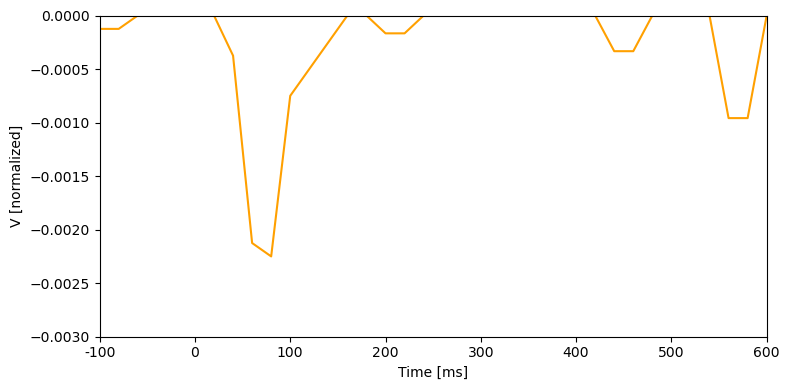

In [7]:
trf_temp = trf['gammatone_1'].sub(sensor='Cz')

p = plot.UTS(trf_temp)